# Sprint 6
## Tasca M6 T01

Allison Garces Castaño

In [2]:
import numpy as np
import pandas as pd

#Bibliotecas de visualización
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Importaciones desde la biblioteca sklearn

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

In [5]:
#Descripcion de la base de Datos Boston House

print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [8]:
#Cargando el conjunto de datos directamente desde sklearn
boston = datasets.load_boston()

In [6]:
#Convertirlo en un marco de datos de pandas
bos = pd.DataFrame(boston.data, columns = boston.feature_names)
bos['PRICE'] = boston.target

print(bos.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


In [9]:
#Ver si hay valores nulos
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

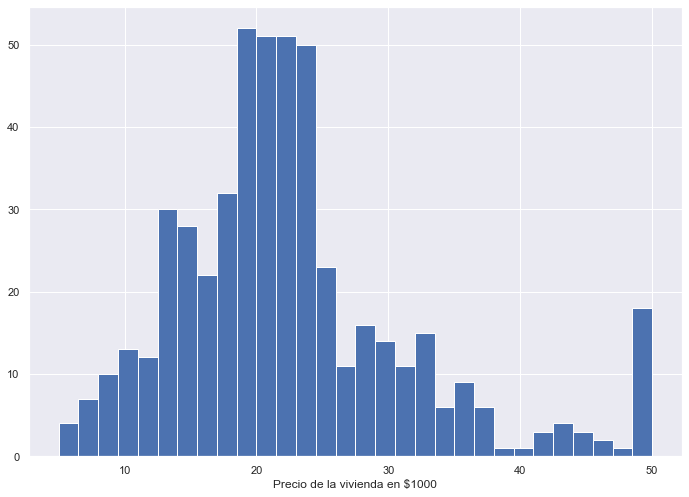

In [10]:
#Grafica de la distribucion de la variable objetivo "PRICE"

sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.hist(bos['PRICE'], bins=30)
plt.xlabel("Precio de la vivienda en $1000")
plt.show()

#La mayoría de las casas tienen un rango de 20 a 24 (en una escala de $ 1000)

<AxesSubplot:>

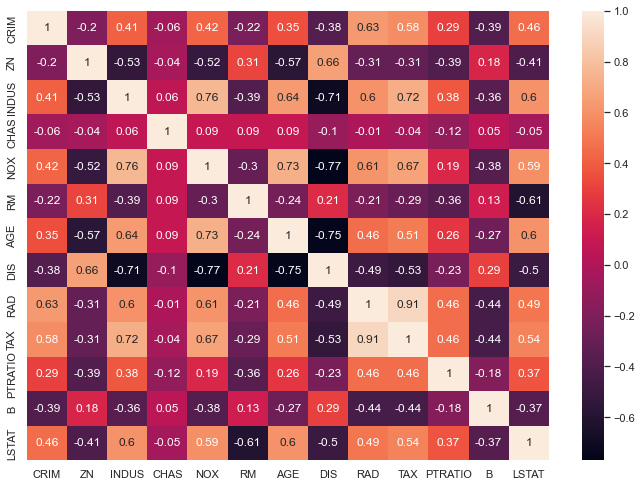

In [11]:
#Matriz de correlación que mide las relaciones lineales entre las variables. Dibujada con Seaborn

#Creé un marco de datos sin la columna de precios, ya que necesitamos ver la correlación entre las variables.

bos_1 = pd.DataFrame(boston.data, columns = boston.feature_names)

correlation_matrix = bos_1.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

#annot True para imprimir los valores dentro del cuadrado

- RM tiene una fuerte correlación positiva con PRICE (0.7)
- LSTAT tiene una alta correlación negativa con PRICE (-0.74)
- Las características RAD, TAX tienen una correlación de 0,91
- Las características DIS y AGE tienen una correlación de -0,75

Distribución de los precios de la vivienda con 'LTSTAT' y 'RM'


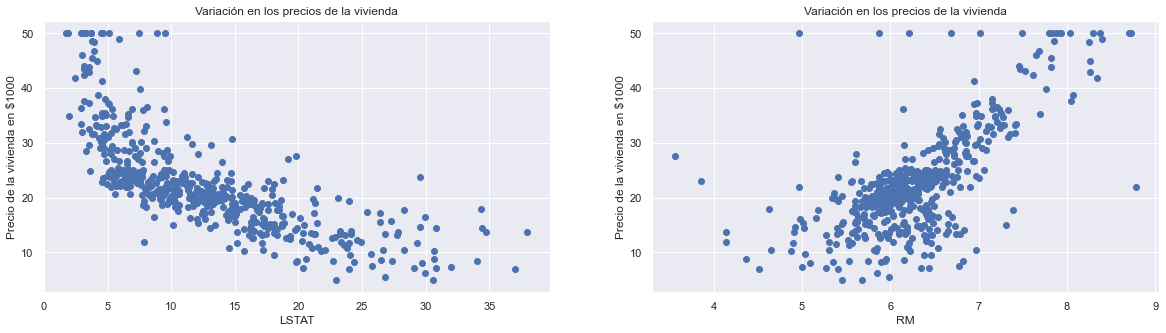

In [15]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = bos['PRICE']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = bos[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title("Variación en los precios de la vivienda")
    plt.xlabel(col)
    plt.ylabel('Precio de la vivienda en $1000')
    
print("Distribución de los precios de la vivienda con 'LTSTAT' y 'RM'")

- Los precios aumentan a medida que el valor de RM aumenta linealmente. Hay pocos valores atípicos y los datos parecen tener un límite de 50.
- Los precios tienden a disminuir con un aumento en LSTAT. Aunque no parece estar siguiendo exactamente una línea lineal.

##### Regresion lineal con la variable "RM" que tiene una correlación positiva con los precios de la vivienda.

In [17]:
X_rooms = bos.RM
y_price = bos.PRICE

X_rooms = np.array(X_rooms).reshape(-1,1)
y_price = np.array(y_price).reshape(-1,1)

print("Ambos tienen las dimensiones de [506,1]")
print(X_rooms.shape)
print(y_price.shape)

Ambos tienen las dimensiones de [506,1]
(506, 1)
(506, 1)


In [19]:
#Conjuntos de entrenamiento y prueba con la función train_test_split proporcionada por la biblioteca scikit-learn

X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X_rooms, y_price, test_size = 0.2, random_state=5)

print(X_train_1.shape)
print(X_test_1.shape)
print(Y_train_1.shape)
print(Y_test_1.shape)

#Se imprimen las formas de nuestro conjunto de entrenamiento y prueba para verificar si la división se ha producido correctamente.

(404, 1)
(102, 1)
(404, 1)
(102, 1)


El tren tiene la salida de [404,1] y los datos de prueba son del tamaño [102,1].

--------------------------------------------------------------------------------------------------------------------------------
Rendimiento del modelo en los datos del tren para 1 variable

In [20]:
#LinearRegression de scikit-learn para entrenar nuestro modelo

reg_1 = LinearRegression()
reg_1.fit(X_train_1, Y_train_1)

y_train_predict_1 = reg_1.predict(X_train_1)
rmse = (np.sqrt(mean_squared_error(Y_train_1, y_train_predict_1)))
r2 = round(reg_1.score(X_train_1, Y_train_1),2)

print("Rendimiento del modelo para el conjunto de entrenamiento.")
print("--------------------------------------")
print('RMSE es {}'.format(rmse))
print('La puntuación R2 es {}'.format(r2))
print("\n")

Rendimiento del modelo para el conjunto de entrenamiento.
--------------------------------------
RMSE es 6.972277149440585
La puntuación R2 es 0.43




--------------------------------------------------------------------------------------------------------------------------------
Rendimiento del modelo en datos de prueba para 1 variable

In [21]:
#Evaluación del modelo para el conjunto de prueba

y_pred_1 = reg_1.predict(X_test_1)
rmse = (np.sqrt(mean_squared_error(Y_test_1, y_pred_1)))
r2 = round(reg_1.score(X_test_1, Y_test_1),2)

print("El rendimiento del modelo para el conjunto de entrenamiento.")
print("--------------------------------------")
print("Error cuadrático medio de la raíz: {}".format(rmse))
print("R^2: {}".format(r2))
print("\n")

El rendimiento del modelo para el conjunto de entrenamiento.
--------------------------------------
Error cuadrático medio de la raíz: 4.895963186952216
R^2: 0.69




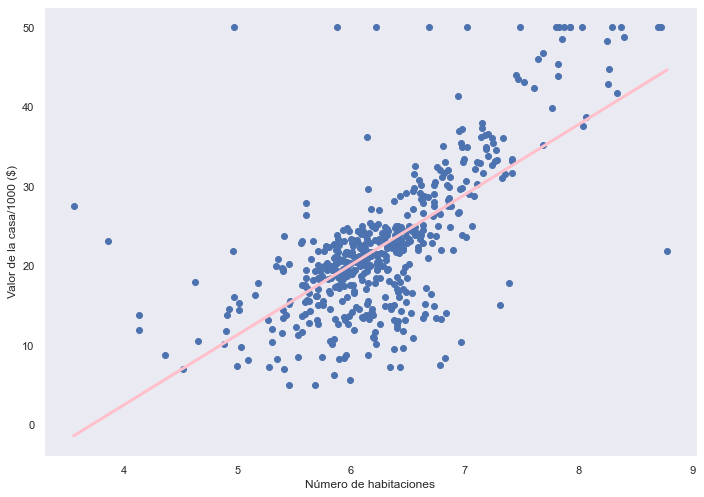

In [25]:
#Grafia de la línea ajustada del modelo en la variable de salida.

prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1,1) 
plt.scatter(X_rooms,y_price)
plt.plot(prediction_space, reg_1.predict(prediction_space), color = 'pink', linewidth = 3)
plt.ylabel('Valor de la casa/1000 ($)')
plt.xlabel('Número de habitaciones')
plt.grid()
plt.show()

##### Modelo de regresión para todas las variables.

-------
Rendimiento del modelo en los datos del tren para todas las variables

In [27]:
X = bos.drop('PRICE', axis = 1)
y = bos['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

reg_all = LinearRegression()
reg_all.fit(X_train, y_train)

#Evaluación del modelo para el conjunto de entrenamiento

y_train_predict = reg_all.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = round(reg_all.score(X_train, y_train),2)

print("Rendimiento del modelo para el conjunto de entrenamiento.")
print("--------------------------------------")
print('RMSE es {}'.format(rmse))
print('La puntuación R2 es {}'.format(r2))
print("\n")

Rendimiento del modelo para el conjunto de entrenamiento.
--------------------------------------
RMSE es 4.6520331848801675
La puntuación R2 es 0.75




----------------------------------------------
Desempeño del modelo en datos de prueba para todas las variables

In [28]:
#Evaluación del modelo para el conjunto de prueba

y_pred = reg_all.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = round(reg_all.score(X_test, y_test),2)

print("El rendimiento del modelo para el conjunto de entrenamiento.")
print("--------------------------------------")
print("Error cuadrático medio de la raíz: {}".format(rmse))
print("R^2: {}".format(r2))
print("\n")

El rendimiento del modelo para el conjunto de entrenamiento.
--------------------------------------
Error cuadrático medio de la raíz: 4.928602182665361
R^2: 0.67




Text(0.5, 1.0, 'Precios reales VS precios previstos')

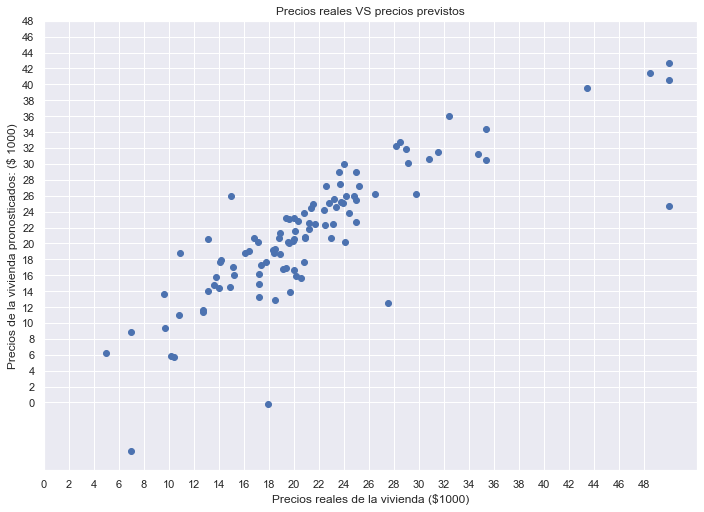

In [30]:
plt.scatter(y_test, y_pred)
plt.xlabel("Precios reales de la vivienda ($1000)")
plt.ylabel("Precios de la vivienda pronosticados: ($ 1000)")
plt.xticks(range(0, int(max(y_test)),2))
plt.yticks(range(0, int(max(y_test)),2))
plt.title("Precios reales VS precios previstos")